# Credit Card Default Prediction

# Problem Description



This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the K-S chart to evaluate which customers will default on their credit card payments


In [1]:
#importing neccesary libraries

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [84]:
#importing dataset
df=pd.read_csv('UCI_Credit_Card.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# Data Description
Attribute Information:

What we know about dataset :

We have records of 30000 customers. Below are the description of all features we have.

    ID: ID of each client

    LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

    SEX: Gender (1 = male, 2 = female)

    EDUCATION: (1 = graduate school, 2 = university, 3 = high school, 0,4,5,6 = others)

    MARRIAGE: Marital status (0 = others, 1 = married, 2 = single, 3 = others)

    AGE: Age in years

Scale for PAY_0 to PAY_6 : (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

    PAY_0: Repayment status in September, 2005 (scale same as above)

    PAY_2: Repayment status in August, 2005 (scale same as above)

    PAY_3: Repayment status in July, 2005 (scale same as above)

    PAY_4: Repayment status in June, 2005 (scale same as above)

    PAY_5: Repayment status in May, 2005 (scale same as above)

    PAY_6: Repayment status in April, 2005 (scale same as above)

    BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

    BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

    BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

    BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

    BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

    BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

    PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

    PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

    PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

    PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

    PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

    PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

    default.payment.next.month: Default payment (1=yes, 0=no)

Dataset Rows & Columns Count


In [3]:
#check data shape

df.shape

(30000, 25)

Dataset Information


In [85]:
#check data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [4]:
#data description

df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [86]:
#check any duplicates

len(df[df.duplicated()])

0

Hence no duplicates are present in the data.



In [87]:
#columns of dataset

df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [88]:
# Taking the sum of null values in columns from a dataset

df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

Text(0.5, 1.0, 'Missing Value Percentage')

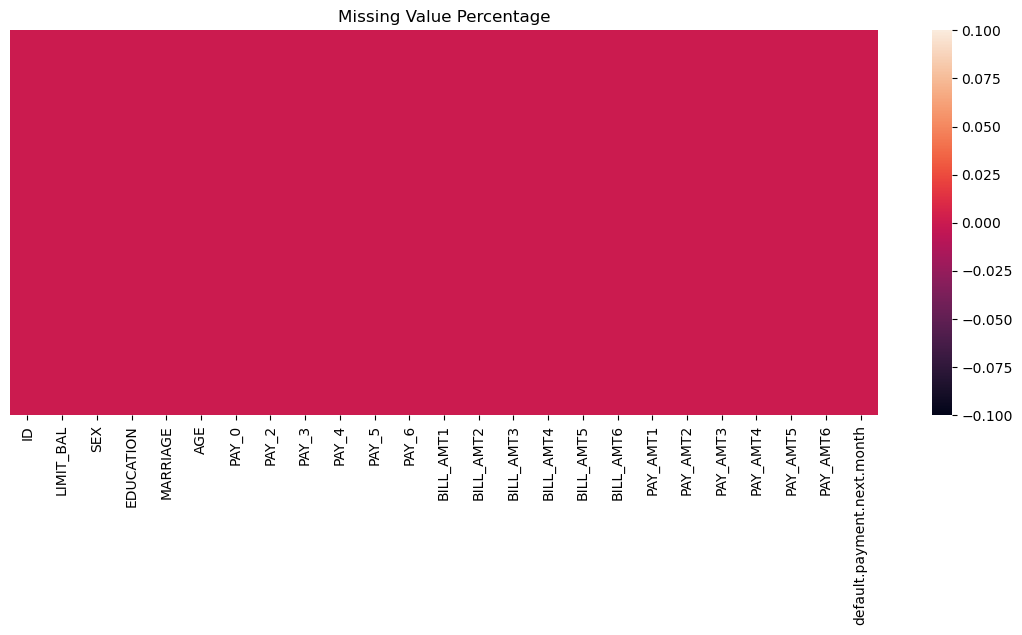

In [8]:
#plot to check null values

plt.figure(figsize=(14,5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.title("Missing Value Percentage")

Dataset dose not contains any NA values, null values and duplicates.


# Data Processing


Changing name of some columns for simplicity and better understanding



In [89]:
df.rename(columns={'default.payment.next.month':'IsDefaulter'}, inplace=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,IsDefaulter
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [90]:
df.drop("ID", axis=1, inplace=True)

In [91]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,IsDefaulter
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [15]:
df1=df.copy()
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,IsDefaulter
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [16]:
# renaming of colums

df1.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df1.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df1.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)


In [19]:
# checking for rename

df1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [20]:
# replacing values with labels
# replacing values with there labels

df1.replace({'SEX':{1:'Male', 2:'Female'}}, inplace=True)
df1.replace({'EDUCATION':{1:'Graduate School', 2:'University', 3:'High School', 4:'Others'}}, inplace=True)
df1.replace({'MARRIAGE' : {1 : 'Married', 2 : 'Single', 3 : 'Others'}}, inplace = True)
df1.replace({'IsDefaulter' : {1 : 'Yes', 0 : 'No'}}, inplace = True)


In [21]:
#checking for replaced labels

df1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,20000.0,Female,University,Married,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,Yes
1,120000.0,Female,University,Single,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,Yes
2,90000.0,Female,University,Single,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,No
3,50000.0,Female,University,Married,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,No
4,50000.0,Male,University,Married,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,No


# EDA (Exploratory Data Analysis)


Dependent Variable:


Is Defaulter

In [22]:
# Value counts of Isdefaulter

df1['IsDefaulter'].value_counts()


IsDefaulter
No     23364
Yes     6636
Name: count, dtype: int64

<Axes: xlabel='IsDefaulter', ylabel='count'>

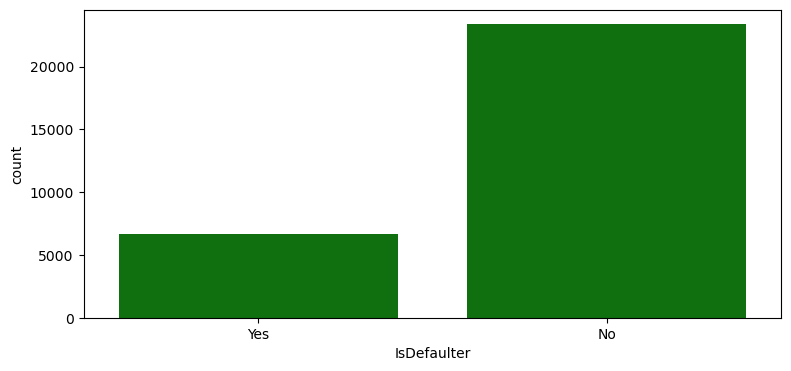

In [23]:
#value count plot for IsDefaulter

plt.figure(figsize=(9,4))
sns.countplot(x='IsDefaulter', data=df1, color='green')

Here we can see defaulters are less as compare to Non defaulter in the given dataset, So we can say that we have imbalanced dataset

Independent Variable


Categorical Features


We have few categorical features in our dataset. Let'Check how they are related with out target class.

# Sex

In [24]:
#value counts for sex category

df1['SEX'].value_counts()

SEX
Female    18112
Male      11888
Name: count, dtype: int64

<Axes: xlabel='SEX', ylabel='count'>

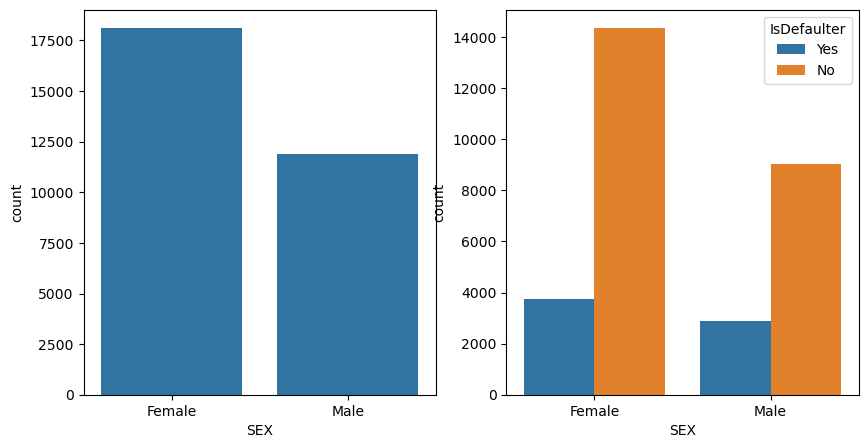

In [25]:
#count plot for Sex and with respect to IsDefaulter

fig, axes=plt.subplots(ncols=2, figsize=(10,5))
sns.countplot(x='SEX', ax=axes[0], data=df1)
sns.countplot(x='SEX', hue='IsDefaulter', ax=axes[1], data=df1)

# Education

As we can see in dataset we have values like 5,6,0 as well for which we are not having description so we can add up them in 4, which is Others.

In [26]:
fil = (df1['EDUCATION'] == 0) | (df1['EDUCATION'] == 5) | (df1['EDUCATION'] == 6) | (df1['EDUCATION'] == 4)

df.loc[fil, 'EDUCATION']='Others'

In [27]:
# values counts for education category

df1['EDUCATION'].value_counts()

EDUCATION
University         14030
Graduate School    10585
High School         4917
5                    280
Others               123
6                     51
0                     14
Name: count, dtype: int64

<Axes: xlabel='EDUCATION', ylabel='count'>

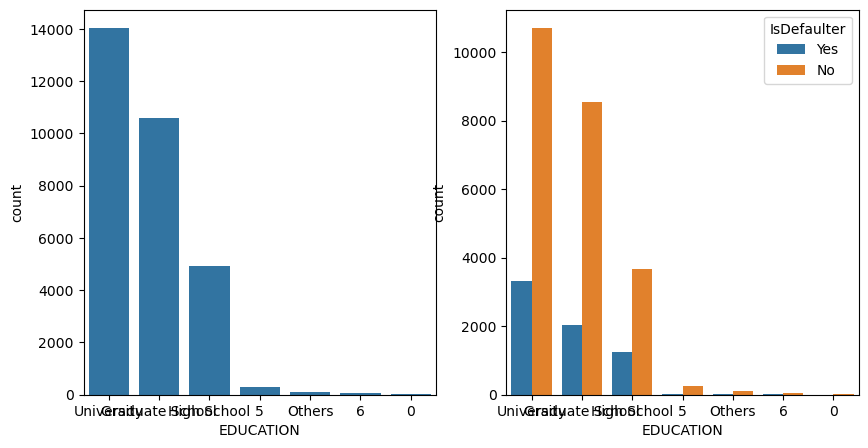

In [28]:
#count plot for EDUCATION and with respect to IsDefaulter

fig, axes=plt.subplots(ncols=2, figsize=(10,5))
sns.countplot(x='EDUCATION', ax=axes[0], data=df1)
sns.countplot(x='EDUCATION', hue='IsDefaulter', ax=axes[1], data=df1)

# Marriage

In [29]:
#Value counts for marriage category

fil=df1['MARRIAGE']==0
df1.loc[fil, 'MARRIAGE']='Others'
df1['MARRIAGE'].value_counts()


MARRIAGE
Single     15964
Married    13659
Others       377
Name: count, dtype: int64

<Axes: xlabel='MARRIAGE', ylabel='count'>

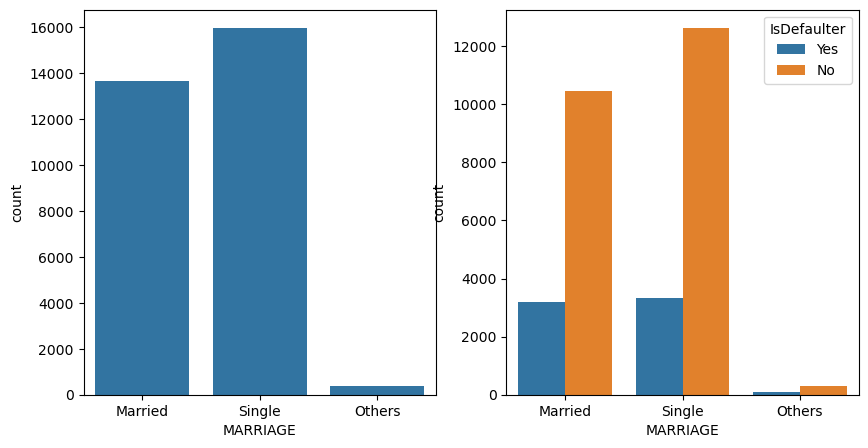

In [30]:
#count plot for MARRIAGE and with respect to IsDefaulter

fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'MARRIAGE', ax = axes[0], data = df1)
sns.countplot(x = 'MARRIAGE', hue = 'IsDefaulter',ax = axes[1], data = df1)

# Age

Plotting graph of number of ages of all people with credit card irrespective of gender.



In [31]:
# age wise values of credit card holder

df1['AGE'].value_counts()

AGE
29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: count, dtype: int64

<Axes: xlabel='AGE', ylabel='count'>

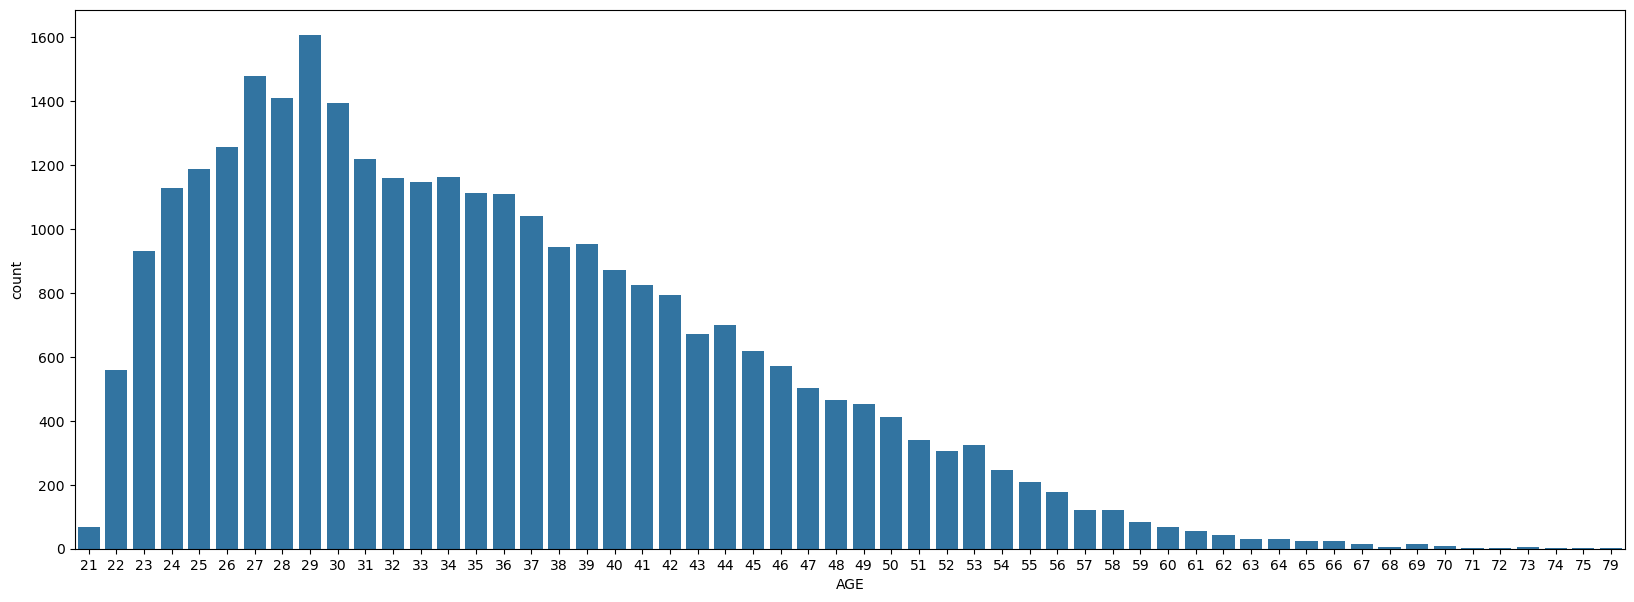

In [32]:
#values count for AGE

plt.figure(figsize=(20,7))
sns.countplot(x="AGE", data=df1)

<Axes: xlabel='AGE', ylabel='count'>

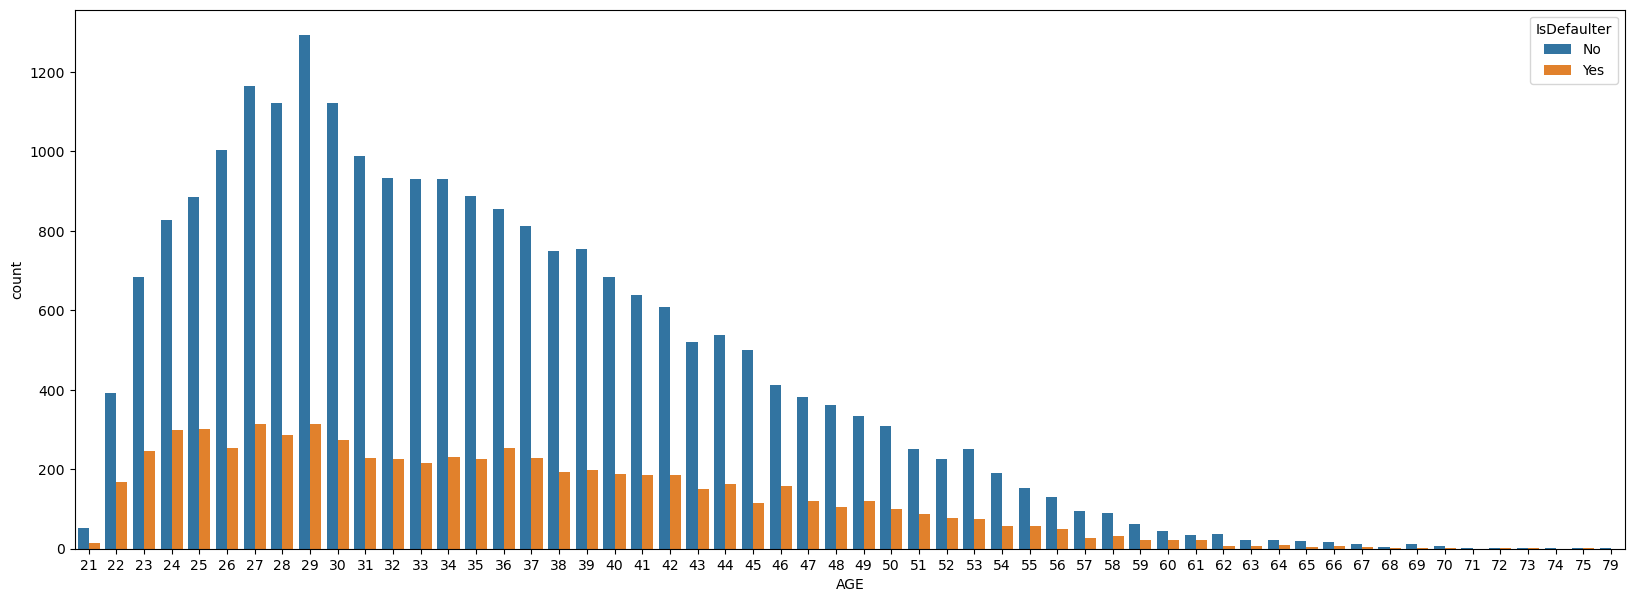

In [33]:
#values count for AGE with respect to isdefaulter

plt.figure(figsize=(20,7))
sns.countplot(x="AGE", hue='IsDefaulter', data=df1)

Below are few observations for categorical features:



No. of defaulters have a higher proportion of Singles.
